In [1]:
#Instalando os dados necessarios
!pip install sidetable
!pip install ydata_profiling
%pip install plotly
%pip install cufflinks
%pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 43.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f67e60d64bccfd0dd03571d3b1d297276aa2afcddb9266f7fec7e87e5f45039b
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.2 MB/s eta 0:00:00


In [2]:
#Importando as Bibliotecas necessarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable
import missingno as msno
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

from ydata_profiling import ProfileReport
from ipywidgets import interact, widgets
from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [31]:
#Baixando os dados
try:
    df = pd.read_csv('/content/drive/MyDrive/Desafio 07/data.csv', encoding='utf-8')
     # tentando ler com UTF-8 primeiro
except UnicodeDecodeError:
    df = pd.read_csv('/content/drive/MyDrive/Desafio 07/data.csv', encoding='latin-1')
    # se UTF-8 falhar, tente latin-1
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [32]:
#1 Analise Exploratoria dos dados
#retirando as informações sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [25]:
#1 Analise Exploratoria dos dados
#Usando o profile report para verificar o dataframe
df.profile_report()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

A partir da analise do Profile Report podemos concluir alguns pontos:

A coluna CustomerID, possui alguns dados nulos que precisam ser excluidos do nosso dataset, para assim tarzermos melhor padronização aos dados.

Tambem foi observados divesas duplicatas no dataset que precisam ser removidas

Tambem iremos modificar a coluna CustomerID de objeto para inteiro a fim de podermos utilizarmos a mesma caso seja necessario para futura analise.

Foi observado tambem nas coluna numericas valores distoantes e negativos em que um processo de remoção de ouliers se faz extremamente necesario para retirar esses dados que podem compometer a analise

In [33]:
#2 Tratamento dos dados
#removendo os valores nulos, definindo um subset
df = df.dropna(subset=['CustomerID'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [34]:
#2 Tratamento dos dados
# Remover duplicatas
df = df.drop_duplicates()

# Remover outliers (utilizando o método IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Aplicando a remoção de outliers nas colunas numéricas
df = remove_outliers(df, 'Quantity')
df = remove_outliers(df, 'UnitPrice')

# Remover dados inconsistentes
# Remover transações com Quantity <= 0 e UnitPrice <= 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333234 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    333234 non-null  object 
 1   StockCode    333234 non-null  object 
 2   Description  333234 non-null  object 
 3   Quantity     333234 non-null  int64  
 4   InvoiceDate  333234 non-null  object 
 5   UnitPrice    333234 non-null  float64
 6   CustomerID   333234 non-null  float64
 7   Country      333234 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 22.9+ MB


In [35]:
#2 Tratamento dos dados
# Garantir que CustomerID seja um número válido (removendo valores nulos e convertendo para inteiro)
if 'CustomerID' in df.columns:
    df = df.dropna(subset=['CustomerID'])
    df['CustomerID'] = df['CustomerID'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333234 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    333234 non-null  object 
 1   StockCode    333234 non-null  object 
 2   Description  333234 non-null  object 
 3   Quantity     333234 non-null  int64  
 4   InvoiceDate  333234 non-null  object 
 5   UnitPrice    333234 non-null  float64
 6   CustomerID   333234 non-null  int64  
 7   Country      333234 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 22.9+ MB


***Escolha das Variáveis***

Quantidade (*Quantity*) e Preço Unitário (*UnitPrice*):

Ambas as variáveis são diretamente relacionadas ao comportamento de compra dos clientes.

**Quantity**: Indica o volume de compras realizadas, permitindo identificar padrões de consumo (por exemplo, grandes compradores versus compradores ocasionais).

**UnitPrice**: Reflete a faixa de preço dos itens adquiridos, ajudando a segmentar clientes que compram produtos de diferentes categorias de preço (produtos premium, intermediários ou econômicos).

Essas variáveis têm uma interpretação clara e forte relação com o objetivo de identificar diferentes perfis de clientes.

Podemos Observar tambem a boa corelação entre ambas ao analisar o HeatMap

Normalização dos Dados:

 Quantidades e preços normalmente possuem escalas muito diferentes. A normalização pelo intervalo [0, 1] com MinMaxScaler foi escolhida para evitar que uma variável (como Quantity, geralmente em valores maiores) domine o processo de clustering.

In [36]:
#3 Normalização dos dados
# Escalando valores para o intervalo [0, 1]
scaler = MinMaxScaler()
numeric_columns = ['Quantity', 'UnitPrice']  # Removido CustomerID, pois por se tratar de um numero identificador unico este poderia gerar ruido na clusterização
numeric_columns = [col for col in numeric_columns if col in df.columns]
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])



In [37]:
# Seleção das variáveis mais relevantes
selected_columns = numeric_columns
X = df[selected_columns]

df = X  # Manter apenas as colunas numéricas normalizadas

# Verificar variabilidade nos dados
if df.var().sum() == 0:
    raise ValueError("Os dados não possuem variabilidade suficiente para clustering.")

***Escolha do Algoritmo de Clustering***

**K-Means:**

O K-Means é amplamente utilizado para segmentação devido à sua simplicidade e eficiência em dividir os dados em clusters esféricos, baseando-se na minimização da inércia (distância intra-cluster).

*Vantagens:*

*   Escalável para grandes conjuntos de dados.
*   
Rápido para executar, mesmo com iterações repetidas.

*Limitação Considerada: *

K-Means assume que os clusters têm formato esférico, o que pode não se aplicar a todos os casos. Porém, dado o escopo das variáveis (Quantity e UnitPrice), a suposição é razoável neste caso.


***Escolha do Número de Clusters (k):***

**Método Elbow:**

Ajuda a identificar o ponto onde o ganho na redução de inércia começa a diminuir significativamente ("cotovelo").

**Por que minimizar a inércia:**

O objetivo do K-Means é encontrar clusters que minimizem a inércia, pois clusters mais compactos indicam maior similaridade entre os pontos de dados dentro de cada cluster. Isso significa que o modelo conseguiu identificar grupos bem definidos.

**Método Silhouette:**

Fornece uma métrica adicional para avaliar a qualidade dos clusters, garantindo que eles sejam bem separados e coesos internamente.

**Combinação dos Métodos:**

A combinação garante que o número ideal de clusters seja baseado tanto na separação quanto na coesão dos grupos.



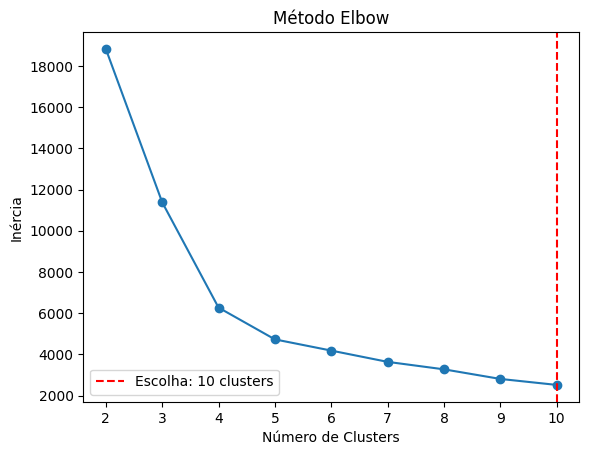

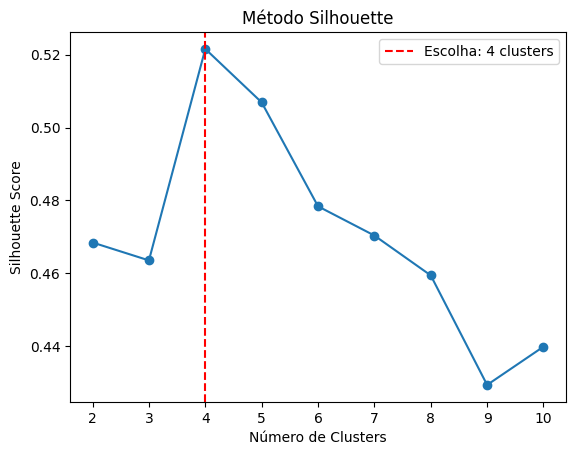

Número ideal de clusters escolhido: 4


In [38]:
# 4 Determinação do numero ideal de Clusters
# Encontrar a quantidade ideal de clusters usando o método Elbow
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Visualizar o gráfico do método Elbow
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método Elbow')
plt.axvline(x=k_range[np.argmin(inertia)], color='red', linestyle='--', label=f'Escolha: {k_range[np.argmin(inertia)]} clusters')
plt.legend()
plt.show()

# Encontrar a quantidade ideal de clusters usando o método Silhouette
silhouette_scores = []
kmeans_models = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(df)
    if len(set(labels)) > 1:  # Garantir que existem pelo menos 2 clusters
        silhouette_scores.append(silhouette_score(df, labels, sample_size=min(1000, len(df)), random_state=42))
        kmeans_models[k] = kmeans  # Armazenar modelos treinados
    else:
        silhouette_scores.append(-1)  # Penalizar caso não haja clusters suficientes

# Visualizar o gráfico do método Silhouette
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Método Silhouette')
plt.axvline(x=k_range[np.argmax(silhouette_scores)], color='red', linestyle='--', label=f'Escolha: {k_range[np.argmax(silhouette_scores)]} clusters')
plt.legend()
plt.show()


# Escolher o melhor número de clusters baseado nos métodos acima
best_k = k_range[np.argmax(silhouette_scores)]

# Exibir o número de clusters escolhido
print(f"Número ideal de clusters escolhido: {best_k}")

# Implementar o algoritmo K-Means com o número ideal de clusters
kmeans = kmeans_models[best_k]
df['Cluster'] = kmeans.predict(df)


Resumo dos clusters:
         Quantity  UnitPrice
Cluster                     
0        0.860939   0.145375
1        0.077996   0.230580
2        0.100895   0.632595
3        0.397854   0.192754


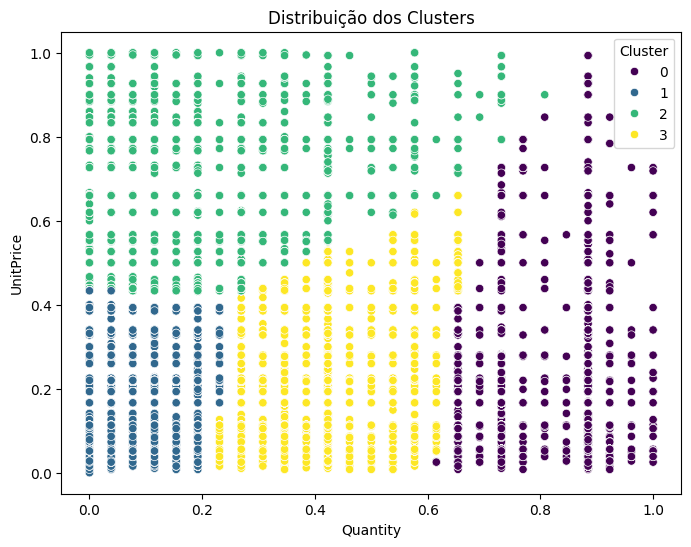

In [39]:
# Análise dos clusters
# Resumo estatístico dos clusters
cluster_summary = df.groupby('Cluster').mean()
print("Resumo dos clusters:")
print(cluster_summary)

# Visualização dos clusters
df_plot_columns = [col for col in ['Quantity', 'UnitPrice'] if col in df.columns]
if len(df_plot_columns) == 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[df_plot_columns[0]], y=df[df_plot_columns[1]], hue=df['Cluster'], palette='viridis')
    plt.xlabel(df_plot_columns[0])
    plt.ylabel(df_plot_columns[1])
    plt.title('Distribuição dos Clusters')
    plt.show()
else:
    print("Colunas insuficientes para visualização dos clusters.")

***1. Perfil de Compras dos Clientes por Cluster***

**Cluster 0:**

Quantity: Alto (0.860939)

UnitPrice: Baixo (0.145375)

Descrição: Esse grupo representa clientes que compram em grandes quantidades, mas de produtos de baixo valor unitário.

**Cluster 1:**

Quantity: Muito Baixo (0.077996)

UnitPrice: Médio-Baixo (0.230580)

Descrição: Clientes que fazem compras em quantidades muito pequenas e de produtos com preço unitário intermediário.

**Cluster 2:**

Quantity: Baixo (0.100895)

UnitPrice: Alto (0.632595)

Descrição: Clientes que preferem produtos de alto valor unitário, mas compram em pequenas quantidades.

**Cluster 3:**

Quantity: Médio (0.397854)

UnitPrice: Baixo (0.192754)

Descrição: Clientes que compram quantidades intermediárias, priorizando produtos de menor custo.

***2. Utilidade da Análise para Segmentação de Clientes***

A análise de clustering permite identificar diferentes perfis de clientes com base no comportamento de compra.

Esses insights podem ajudar a empresa a:

Segmentar a base de clientes em grupos homogêneos para ações específicas.
Personalizar campanhas de marketing, destacando produtos e promoções que sejam mais relevantes para cada segmento.

Otimizar o gerenciamento de estoque, ajustando a oferta de produtos de acordo com a demanda de cada grupo.

***3. Ações Sugeridas Baseadas nos Resultados***

**Cluster 0:**

Ação: Oferecer promoções por volume ou descontos progressivos para aumentar ainda mais a lealdade desse grupo, focado em compras em grande quantidade.
Estratégia de Comunicação: Enviar catálogos de produtos em oferta, destacando as vantagens de comprar em grande escala.

**Cluster 1:**

Ação: Focar em campanhas que incentivem o aumento do volume de compras, como "compre mais e ganhe brindes".
Estratégia de Comunicação: Marketing baseado em fidelidade, oferecendo benefícios para compras frequentes.

**Cluster 2:**

Ação: Destacar produtos premium ou edições limitadas que justifiquem os altos preços unitários.
Estratégia de Comunicação: Investir em comunicação visual atrativa e experiências exclusivas para esse público.

**Cluster 3:**

Ação: Explorar combos ou pacotes promocionais para elevar o ticket médio.
Estratégia de Comunicação: Divulgar mensagens focadas em economia e benefícios adicionais de compras intermediárias.